In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read ipl.csv file and print first 5 records
data=pd.read_csv("ipl_data.csv")
df=data.copy()
df.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
#check total number of columns,entries note down your findings
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [4]:
# find null values
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [5]:
#drop null values of city , winner ,player_of_match,umpire1,umpire2 column
df.dropna(subset=["city","winner","umpire1","umpire2"],inplace=True)
df.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      0
venue                0
umpire1              0
umpire2              0
umpire3            625
dtype: int64

In [6]:
#drop umpire3 column as it contains more than 75% of null values
df.drop(["umpire3"],axis=1,inplace=True)
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan


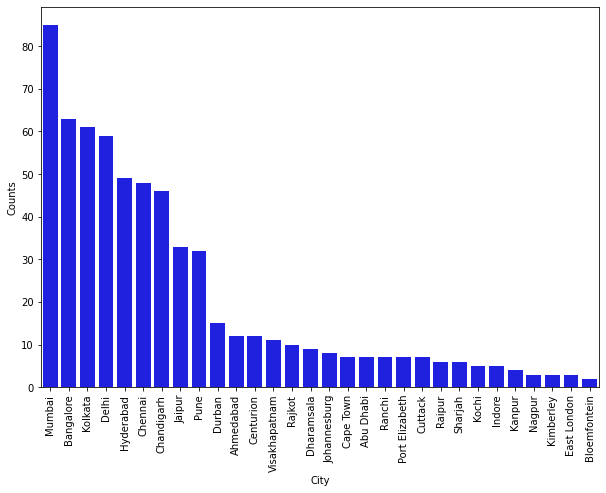

Mumbai            85
Bangalore         63
Kolkata           61
Delhi             59
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Cape Town          7
Abu Dhabi          7
Ranchi             7
Port Elizabeth     7
Cuttack            7
Raipur             6
Sharjah            6
Kochi              5
Indore             5
Kanpur             4
Nagpur             3
Kimberley          3
East London        3
Bloemfontein       2
Name: city, dtype: int64


In [7]:
#which city hosted most number of matches?
#draw bar plot and write down your insights
plt.figure(figsize=(10,7))
sns.countplot(x="city",data=df,order=df.city.value_counts().index,color="blue")
plt.ylabel('Counts', fontsize=10)
plt.xlabel('City', fontsize=10)
plt.xticks(rotation='vertical')
plt.show()
print(df["city"].value_counts())

In [8]:
#find all venue of mumbai city
df["venue"][(df["city"]=="Mumbai")].unique()

array(['Wankhede Stadium', 'Dr DY Patil Sports Academy',
       'Brabourne Stadium'], dtype=object)

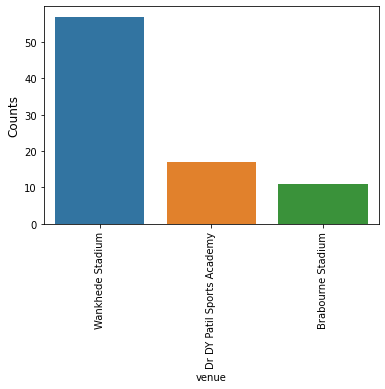

Wankhede Stadium              57
Dr DY Patil Sports Academy    17
Brabourne Stadium             11
Name: venue, dtype: int64


In [9]:
#now compare in which venue of mumbai most number of matches played (draw bar plot and  write down insights)
sns.countplot(data=df,x=(df["venue"][(df["city"]=="Mumbai")]))
plt.ylabel('Counts', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()
print((df["venue"][(df["city"]=="Mumbai")]).value_counts())

In [10]:
#what is the preferred choice after winning a toss in mumbai
print((df["toss_decision"][(df["city"]=="Mumbai")]).value_counts())

field    51
bat      34
Name: toss_decision, dtype: int64


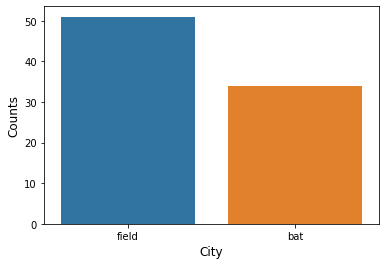

In [11]:
#graphical representation of above question
a=(df["toss_decision"][(df["city"]=="Mumbai")])
sns.countplot(a)
plt.ylabel('Counts', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.show()

In [12]:
#which team won most number of toss
df["toss_winner"].value_counts()

Mumbai Indians                 83
Kolkata Knight Riders          77
Delhi Daredevils               71
Royal Challengers Bangalore    67
Kings XI Punjab                67
Chennai Super Kings            66
Rajasthan Royals               61
Deccan Chargers                43
Sunrisers Hyderabad            34
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

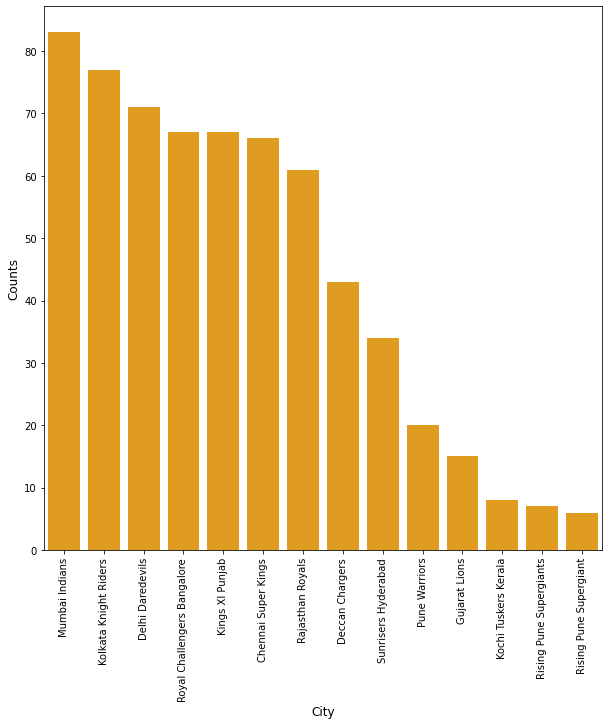

In [13]:
#show graphical representation of above question
plt.figure(figsize=(10,10))
sns.countplot(x="toss_winner",data=df,order=df.toss_winner.value_counts().index,color="orange")
plt.ylabel('Counts', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [14]:
#find what mumbai indians preferred after winning a toss?
(df["toss_decision"][(df["toss_winner"]=="Mumbai Indians")]).value_counts()

field    44
bat      39
Name: toss_decision, dtype: int64

In [16]:
#Which team won most of the matches in mumbai?
df["winner"][df.city == "Mumbai"].value_counts()

Mumbai Indians                 45
Chennai Super Kings             8
Kings XI Punjab                 5
Royal Challengers Bangalore     5
Rajasthan Royals                5
Deccan Chargers                 3
Kolkata Knight Riders           3
Pune Warriors                   3
Rising Pune Supergiant          2
Delhi Daredevils                2
Kochi Tuskers Kerala            1
Sunrisers Hyderabad             1
Rising Pune Supergiants         1
Gujarat Lions                   1
Name: winner, dtype: int64

In [17]:
#how many times each team won the toss and won the match
toss_win=df[(df["toss_winner"] == df["winner"])]
toss_win["winner"].value_counts()

Mumbai Indians                 48
Kolkata Knight Riders          44
Chennai Super Kings            42
Rajasthan Royals               34
Delhi Daredevils               33
Royal Challengers Bangalore    33
Kings XI Punjab                27
Deccan Chargers                19
Sunrisers Hyderabad            16
Gujarat Lions                  10
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Pune Warriors                   3
Rising Pune Supergiants         3
Name: winner, dtype: int64

In [18]:
#how many times each team won the toss and won the match in mumbai
toss_win_mumbai=df[(df["toss_winner"] == df["winner"]) & (df.city=="Mumbai")]
toss_win_mumbai["winner"].value_counts()

Mumbai Indians                 26
Chennai Super Kings             5
Deccan Chargers                 3
Rajasthan Royals                2
Delhi Daredevils                2
Royal Challengers Bangalore     2
Kochi Tuskers Kerala            1
Kolkata Knight Riders           1
Gujarat Lions                   1
Name: winner, dtype: int64

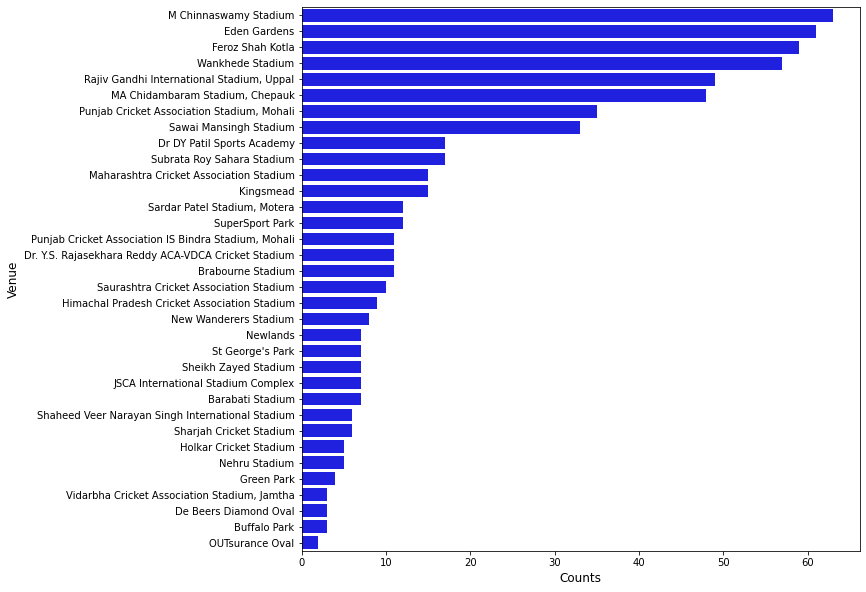

M Chinnaswamy Stadium                                   63
Eden Gardens                                            61
Feroz Shah Kotla                                        59
Wankhede Stadium                                        57
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Maharashtra Cricket Association Stadium                 15
Kingsmead                                               15
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

In [19]:
#which venue hosted most number of matches
plt.figure(figsize=(10,10))
sns.countplot(y="venue",data=df,order=df.venue.value_counts().index,color="blue")
plt.ylabel('Venue', fontsize=12)
plt.xlabel('Counts', fontsize=12)
plt.show()
print(df["venue"].value_counts())

In [20]:
#find how many matches chennai super kings played at M Chinnaswamy stadium?
chennai_chinnaswamy = df[(df.venue == "M Chinnaswamy Stadium") & ((df.team1 == "Chennai Super Kings") | (df.team2 =="Chennai Super Kings"))]
chennai_chinnaswamy["venue"].value_counts()[0]

7

In [21]:
#who won most matches at M Chinnaswamy stadium?
df["winner"][(df.venue == "M Chinnaswamy Stadium")].value_counts()

Royal Challengers Bangalore    29
Mumbai Indians                  8
Kolkata Knight Riders           6
Kings XI Punjab                 5
Chennai Super Kings             4
Rajasthan Royals                3
Delhi Daredevils                3
Sunrisers Hyderabad             2
Rising Pune Supergiant          1
Gujarat Lions                   1
Deccan Chargers                 1
Name: winner, dtype: int64

In [22]:
#matches played in each year
df["season"].value_counts()


2013    76
2012    74
2011    72
2010    60
2016    60
2017    58
2008    58
2009    57
2015    57
2014    53
Name: season, dtype: int64

In [24]:
#which city hosted most number of matches in 2013 
city_2013=df["city"][(df.season == 2013)].value_counts()
city_2013

Kolkata       8
Bangalore     8
Hyderabad     8
Delhi         8
Chennai       8
Pune          8
Jaipur        8
Mumbai        8
Chandigarh    6
Dharamsala    2
Raipur        2
Ranchi        2
Name: city, dtype: int64